# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [220]:
df = pd.read_csv('hasil_clustering_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12840 entries, 0 to 12839
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jml_anggota_keluarga    12840 non-null  float64
 1   luas_lantai             12840 non-null  float64
 2   lantai                  12840 non-null  float64
 3   jumlah_kamar            12840 non-null  float64
 4   sumber_air_minum        12840 non-null  float64
 5   daya                    12840 non-null  float64
 6   bb_masak                12840 non-null  float64
 7   kloset                  12840 non-null  float64
 8   buang_tinja             12840 non-null  float64
 9   kondisi_dinding         12840 non-null  object 
 10  fas_bab                 12840 non-null  object 
 11  kondisi_atap            12840 non-null  object 
 12  sta_bangunan            12840 non-null  object 
 13  sta_lahan               12840 non-null  object 
 14  ada_sepeda              12840 non-null

In [221]:
# Melihat 5 data teratas
print("\nLima data teratas:")
df.head()


Lima data teratas:


,jml_anggota_keluarga,luas_lantai,lantai,jumlah_kamar,sumber_air_minum,daya,bb_masak,kloset,buang_tinja,kondisi_dinding,...,kondisi_atap,sta_bangunan,sta_lahan,ada_sepeda,aset_tak_bergerak,ada_lemari_es,sta_art_usaha,id_partisipasi_sekolah,ada_motor,Cluster
0,3.0,70.0,4.0,3.0,6.0,2.0,3.0,1.0,1.0,Jelek,...,Jelek,Bukan miliki sendiri,Bukan miliki sendiri,Tidak,Ya,Tidak,Tidak,Tidak bersekolah lagi,Tidak,1
1,3.0,4.0,6.0,2.0,5.0,1.0,3.0,1.0,3.0,Jelek,...,Jelek,Milik sendiri,Milik sendiri,Ya,Ya,Tidak,Tidak,Masih sekolah,Tidak,1
2,3.0,4.0,6.0,2.0,5.0,1.0,3.0,1.0,3.0,Jelek,...,Jelek,Milik sendiri,Milik sendiri,Ya,Ya,Tidak,Tidak,Tidak bersekolah lagi,Tidak,1
3,2.0,34.0,6.0,2.0,6.0,1.0,3.0,1.0,3.0,Jelek,...,Jelek,Milik sendiri,Milik sendiri,Ya,Ya,Tidak,Tidak,Tidak bersekolah lagi,Tidak,1
4,3.0,45.0,2.0,1.0,6.0,3.0,3.0,2.0,3.0,Jelek,...,Jelek,Bukan miliki sendiri,Bukan miliki sendiri,Ya,Ya,Tidak,Tidak,Tidak bersekolah lagi,Ya,1



Distribusi Cluster:
Cluster
3    5082
1    4487
0    2705
2     566
Name: count, dtype: int64


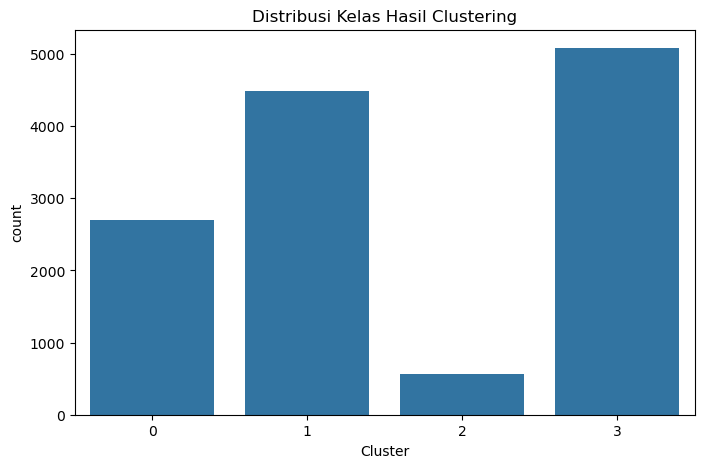

In [222]:
# Memeriksa distribusi kelas (cluster)
print("\nDistribusi Cluster:")
print(df['Cluster'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df)
plt.title('Distribusi Kelas Hasil Clustering')
plt.show()

In [223]:
df

,jml_anggota_keluarga,luas_lantai,lantai,jumlah_kamar,sumber_air_minum,daya,bb_masak,kloset,buang_tinja,kondisi_dinding,...,kondisi_atap,sta_bangunan,sta_lahan,ada_sepeda,aset_tak_bergerak,ada_lemari_es,sta_art_usaha,id_partisipasi_sekolah,ada_motor,Cluster
0,3.0,70.0,4.0,3.0,6.0,2.0,3.0,1.0,1.0,Jelek,...,Jelek,Bukan miliki sendiri,Bukan miliki sendiri,Tidak,Ya,Tidak,Tidak,Tidak bersekolah lagi,Tidak,1
1,3.0,4.0,6.0,2.0,5.0,1.0,3.0,1.0,3.0,Jelek,...,Jelek,Milik sendiri,Milik sendiri,Ya,Ya,Tidak,Tidak,Masih sekolah,Tidak,1
2,3.0,4.0,6.0,2.0,5.0,1.0,3.0,1.0,3.0,Jelek,...,Jelek,Milik sendiri,Milik sendiri,Ya,Ya,Tidak,Tidak,Tidak bersekolah lagi,Tidak,1
3,2.0,34.0,6.0,2.0,6.0,1.0,3.0,1.0,3.0,Jelek,...,Jelek,Milik sendiri,Milik sendiri,Ya,Ya,Tidak,Tidak,Tidak bersekolah lagi,Tidak,1
4,3.0,45.0,2.0,1.0,6.0,3.0,3.0,2.0,3.0,Jelek,...,Jelek,Bukan miliki sendiri,Bukan miliki sendiri,Ya,Ya,Tidak,Tidak,Tidak bersekolah lagi,Ya,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12835,1.0,350.0,2.0,2.0,6.0,1.0,3.0,1.0,2.0,Jelek,...,Jelek,Bukan miliki sendiri,Bukan miliki sendiri,Tidak,Ya,Tidak,Tidak,Tidak bersekolah lagi,Ya,1
12836,2.0,420.0,6.0,2.0,6.0,1.0,6.0,1.0,2.0,Jelek,...,Jelek,Milik sendiri,Milik sendiri,Ya,Ya,Tidak,Tidak,Tidak bersekolah lagi,Ya,0
12837,3.0,68.0,6.0,2.0,6.0,6.0,3.0,1.0,2.0,Jelek,...,Jelek,Milik sendiri,Milik sendiri,Ya,Ya,Tidak,Tidak,Tidak bersekolah lagi,Tidak,1
12838,4.0,620.0,2.0,2.0,6.0,1.0,3.0,1.0,2.0,Jelek,...,Jelek,Milik sendiri,Bukan miliki sendiri,Ya,Ya,Ya,Tidak,Tidak bersekolah lagi,Tidak,1


Namun karena ada ketimpangan disini yang disebut Imbalanced Dataset.Imbalanced Dataset sendiri adalah situasi ketika jumlah data pada satu kelas jauh lebih sedikit atau lebih banyak dibandingkan dengan kelas lainnya., maka saya akan melakukan oversampling menggunakan teknik SMOTE setelah kita melakukan splitting.

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [224]:
# Memisahkan fitur dan target
X = df.drop('Cluster', axis=1)
y = df['Cluster']


In [225]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [226]:
# Identifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [227]:
# Preprocessor untuk data numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

In [228]:
# Preprocess data latih untuk SMOTE
# SMOTE membutuhkan data numerik, jadi kita perlu mengubah fitur kategori menjadi numerik dulu
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [229]:
# Terapkan SMOTE pada data latih yang sudah dipreprocessing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [230]:
print("Ukuran dataset sebelum SMOTE:", sorted(pd.Series(y_train).value_counts().items()))
print("Ukuran dataset setelah SMOTE:", sorted(pd.Series(y_resampled).value_counts().items()))


Ukuran dataset sebelum SMOTE: [(0, 2164), (1, 3589), (2, 453), (3, 4066)]
Ukuran dataset setelah SMOTE: [(0, 4066), (1, 4066), (2, 4066), (3, 4066)]


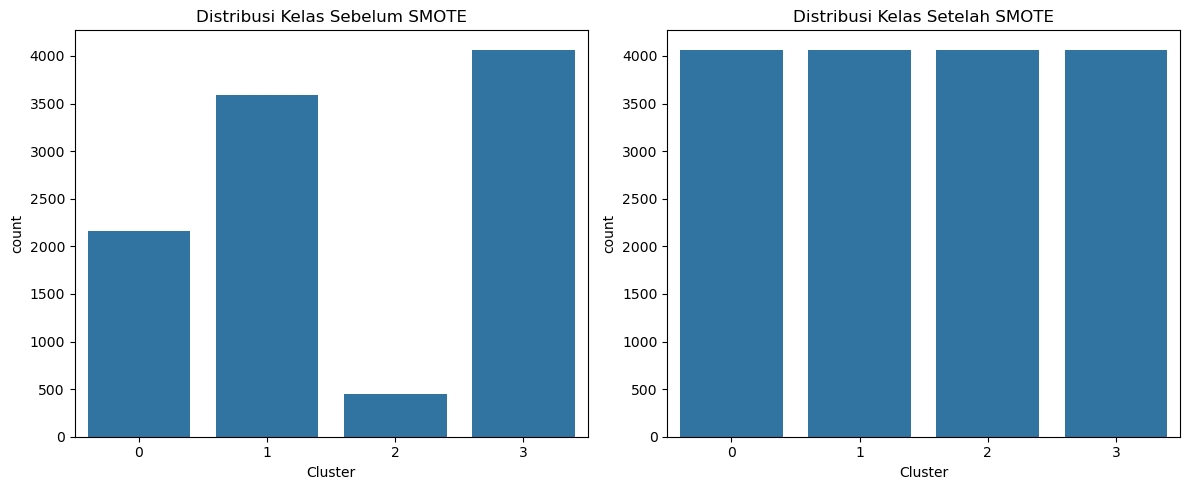

In [231]:
# Visualisasikan distribusi kelas sebelum dan setelah SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Distribusi Kelas Sebelum SMOTE")

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas Setelah SMOTE")

plt.tight_layout()
plt.show()

Nice, kita sudah berhasil melakukan SMOTE untuk menghindari imbalance data

Lanjut kita membangun model.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [232]:
# Model 1
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_resampled, y_resampled)
print("Model Decision Tree.")

Model Decision Tree.


In [233]:
# Model 2
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
print("Model Random Forest.")

Model Random Forest.


In [234]:
# Model 3
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_resampled, y_resampled)
print("Model Support Vector Classifier (SVC).")

Model Support Vector Classifier (SVC).


1. Decision Tree: Model ini dipilih karena kemampuannya dalam menangani fitur campuran (numerik dan kategorikal), interpretabilitasnya yang baik, dan kemampuannya dalam menangkap pola non-linear dalam data. Decision Tree juga mampu menangkap interaksi kompleks antar fitur.

2. Random Forest: Ini adalah algoritma ensemble yang membangun banyak decision tree dan menggabungkan hasilnya. Random Forest umumnya memberikan performa yang lebih baik daripada Decision Tree tunggal karena mengurangi overfitting dan variance. Model ini cocok untuk dataset yang memiliki banyak fitur dan dapat menangani berbagai jenis data.

3. Support Vector Machine (SVM): SVM dipilih karena kemampuannya yang kuat dalam klasifikasi terutama pada dataset yang tidak linear dengan menggunakan kernel trick. SVM bekerja dengan mencari hyperplane optimal yang memisahkan kelas dengan margin terbesar. Model ini sangat efektif dalam ruang dimensi tinggi dan dapat diandalkan meskipun jumlah fitur lebih besar dari jumlah sampel. Selain itu, SVM juga tahan terhadap overfitting terutama dalam kasus dimensi tinggi

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [235]:
# Jangan lupa untuk preprocess data uji
X_test_preprocessed = preprocessor.transform(X_test)


In [236]:
# Fungsi evaluasi untuk multiclass
def evaluate_model_multiclass(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # macro untuk rata-rata antar kelas
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results = {
        'Confusion Matrix': cm,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }
    return results



In [237]:
# Evaluasi semua model
results = {
    'Decision Tree': evaluate_model_multiclass(dt_classifier, X_test_preprocessed, y_test),
    'Random Forest': evaluate_model_multiclass(rf_classifier, X_test_preprocessed, y_test),
    'SVM': evaluate_model_multiclass(svm_classifier, X_test_preprocessed, y_test)
}

In [238]:
# Buat DataFrame ringkasan metrik
summary_df = pd.DataFrame([
    {
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for name, metrics in results.items()
])

print(summary_df)

           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.976246   0.982280  0.983610  0.982921
1  Random Forest  0.978972   0.982896  0.981410  0.982143
2            SVM  0.988318   0.986934  0.991604  0.989240



=== Decision Tree ===
Confusion Matrix:
[[540   0   0   1]
 [  0 862   1  35]
 [  0   0 113   0]
 [  0  24   0 992]]


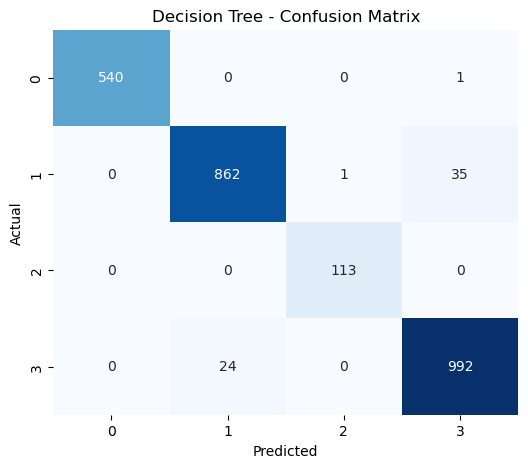


=== Random Forest ===
Confusion Matrix:
[[539   0   1   1]
 [  5 869   0  24]
 [  0   2 111   0]
 [  0  21   0 995]]


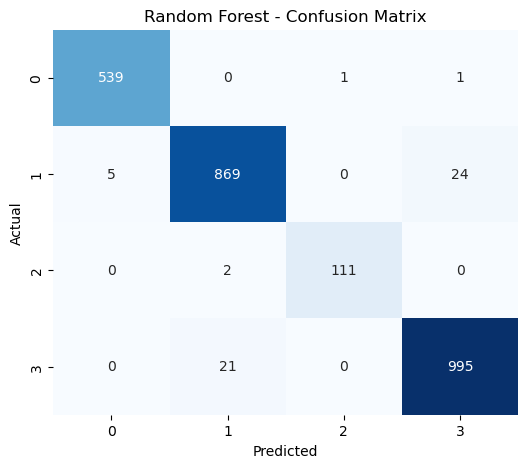


=== SVM ===
Confusion Matrix:
[[ 539    0    1    1]
 [   7  880    1   10]
 [   0    0  113    0]
 [   0   10    0 1006]]


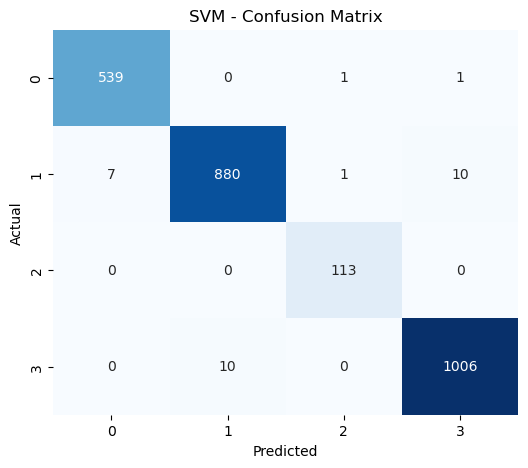

In [239]:
for name, metrics in results.items():
    print(f"\n=== {name} ===")
    cm = metrics['Confusion Matrix']
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Dalam pembuatan model ini, dilakukan evaluasi terhadap tiga algoritma klasifikasi, yaitu Decision Tree, Random Forest, dan Support Vector Machine (SVM). Evaluasi dilakukan menggunakan metrik umum untuk klasifikasi multi-kelas, yaitu Accuracy, Precision, Recall, dan F1-Score. Selain itu, ditampilkan pula confusion matrix dari masing-masing model untuk melihat distribusi prediksi secara lebih detail.

Dari hasil evaluasi di atas, dapat dilihat bahwa SVM menghasilkan performa terbaik pada seluruh metrik evaluasi, dengan nilai accuracy mencapai 98.83%, precision 98.69%, recall 99.16%, dan f1-score 98.92%.

- Model Decision Tree memiliki akurasi yang cukup tinggi, namun masih terdapat kesalahan klasifikasi pada kelas kedua dan keempat, seperti terlihat pada baris ke-2 dan ke-4 confusion matrix.

- Random Forest menghasilkan prediksi yang lebih baik dibandingkan Decision Tree, terutama dengan penurunan jumlah kesalahan pada kelas kedua dan ketiga.

- SVM memberikan hasil klasifikasi terbaik, dengan jumlah kesalahan prediksi yang sangat kecil di seluruh kelas. Ini tercermin dari nilai metrik evaluasi yang unggul dibandingkan dua model lainnya.

Berdasarkan hasil evaluasi, dapat disimpulkan bahwa Support Vector Machine (SVM) merupakan algoritma yang paling optimal digunakan untuk kasus ini. Model ini mampu memberikan akurasi dan f1-score tertinggi serta kesalahan klasifikasi yang paling minim, menjadikannya pilihan yang tepat untuk diterapkan pada data yang digunakan dalam submission ini.





## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [240]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
import numpy as np

In [241]:
# ---------- DECISION TREE ----------
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 20, 2)
}

param_space_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': (5, 50),
    'min_samples_split': (2, 20)
}

In [242]:
print("\n--- Tuning Decision Tree ---")
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, n_jobs=-1, verbose=1)
grid_dt.fit(X_resampled, y_resampled)
print("Best (Grid):", grid_dt.best_params_)

random_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist_dt, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
random_dt.fit(X_resampled, y_resampled)
print("Best (Random):", random_dt.best_params_)

bayes_dt = BayesSearchCV(DecisionTreeClassifier(random_state=42), param_space_dt, n_iter=32, cv=3, n_jobs=-1, verbose=1, random_state=42)
bayes_dt.fit(X_resampled, y_resampled)
print("Best (Bayes):", bayes_dt.best_params_)


--- Tuning Decision Tree ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best (Grid): {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best (Random): {'min_samples_split': 2, 'max_depth': 40, 'criterion': 'entropy'}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candida

In [243]:
# ---------- RANDOM FOREST ----------
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

param_dist_rf = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(10, 60, 10),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_space_rf = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy']
}


In [244]:
print("\n--- Tuning Random Forest ---")
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=1)
grid_rf.fit(X_resampled, y_resampled)
print("Best (Grid):", grid_rf.best_params_)

random_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist_rf, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
random_rf.fit(X_resampled, y_resampled)
print("Best (Random):", random_rf.best_params_)

bayes_rf = BayesSearchCV(RandomForestClassifier(random_state=42), param_space_rf, n_iter=32, cv=3, n_jobs=-1, verbose=1, random_state=42)
bayes_rf.fit(X_resampled, y_resampled)
print("Best (Bayes):", bayes_rf.best_params_)


--- Tuning Random Forest ---
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best (Grid): {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best (Random): {'n_estimators': 400, 'min_samples_split': 5, 'max_depth': 30, 'criterion': 'entropy'}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 f

In [245]:
# ---------- SVM ----------
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_dist_svm = {
    'C': np.logspace(-2, 2, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_space_svm = {
    'C': (0.01, 100),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [246]:
print("\n--- Tuning SVM ---")
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, n_jobs=-1, verbose=1)
grid_svm.fit(X_resampled, y_resampled)
print("Best (Grid):", grid_svm.best_params_)

random_svm = RandomizedSearchCV(SVC(random_state=42), param_dist_svm, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
random_svm.fit(X_resampled, y_resampled)
print("Best (Random):", random_svm.best_params_)

bayes_svm = BayesSearchCV(SVC(random_state=42), param_space_svm, n_iter=32, cv=3, n_jobs=-1, verbose=1, random_state=42)
bayes_svm.fit(X_resampled, y_resampled)
print("Best (Bayes):", bayes_svm.best_params_)


--- Tuning SVM ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best (Grid): {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best (Random): {'kernel': 'linear', 'gamma': 'auto', 'C': 35.93813663804626}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 fo

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [247]:
def evaluate_model_hypertuning(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi Confusion Matrix langsung
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"==== {model_name} ====")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (macro avg)': report['macro avg']['precision'],
        'Recall (macro avg)': report['macro avg']['recall'],
        'F1-Score (macro avg)': report['macro avg']['f1-score']
    }

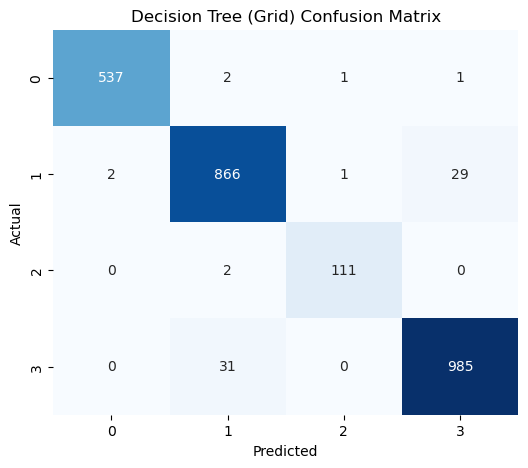

==== Decision Tree (Grid) ====
Accuracy: 0.9731
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       541
           1       0.96      0.96      0.96       898
           2       0.98      0.98      0.98       113
           3       0.97      0.97      0.97      1016

    accuracy                           0.97      2568
   macro avg       0.98      0.98      0.98      2568
weighted avg       0.97      0.97      0.97      2568



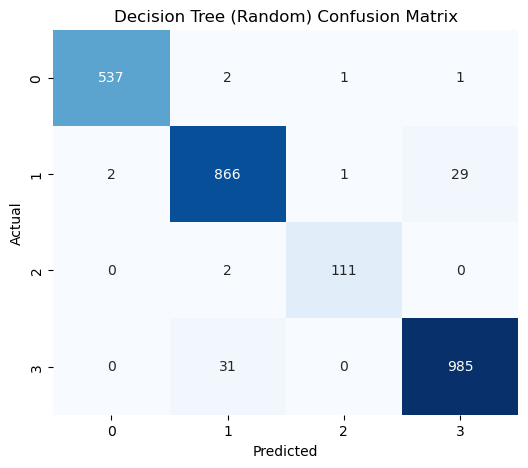

==== Decision Tree (Random) ====
Accuracy: 0.9731
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       541
           1       0.96      0.96      0.96       898
           2       0.98      0.98      0.98       113
           3       0.97      0.97      0.97      1016

    accuracy                           0.97      2568
   macro avg       0.98      0.98      0.98      2568
weighted avg       0.97      0.97      0.97      2568



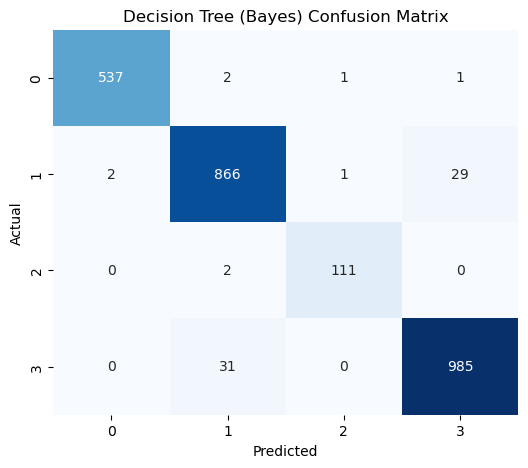

==== Decision Tree (Bayes) ====
Accuracy: 0.9731
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       541
           1       0.96      0.96      0.96       898
           2       0.98      0.98      0.98       113
           3       0.97      0.97      0.97      1016

    accuracy                           0.97      2568
   macro avg       0.98      0.98      0.98      2568
weighted avg       0.97      0.97      0.97      2568



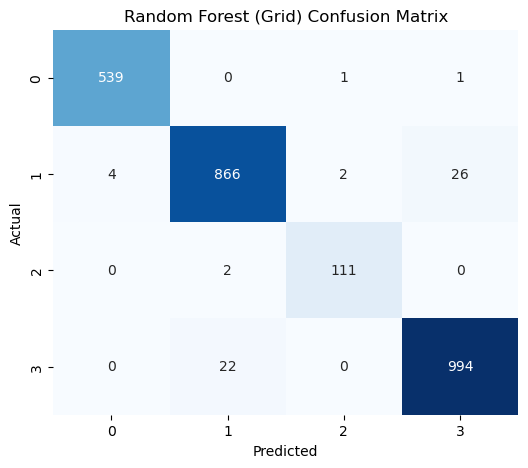

==== Random Forest (Grid) ====
Accuracy: 0.9774
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       541
           1       0.97      0.96      0.97       898
           2       0.97      0.98      0.98       113
           3       0.97      0.98      0.98      1016

    accuracy                           0.98      2568
   macro avg       0.98      0.98      0.98      2568
weighted avg       0.98      0.98      0.98      2568



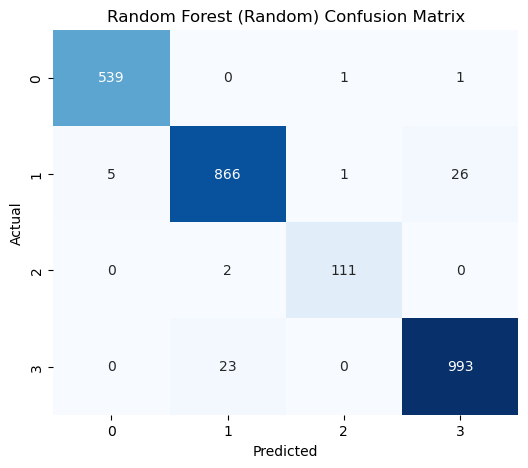

==== Random Forest (Random) ====
Accuracy: 0.9770
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       541
           1       0.97      0.96      0.97       898
           2       0.98      0.98      0.98       113
           3       0.97      0.98      0.98      1016

    accuracy                           0.98      2568
   macro avg       0.98      0.98      0.98      2568
weighted avg       0.98      0.98      0.98      2568



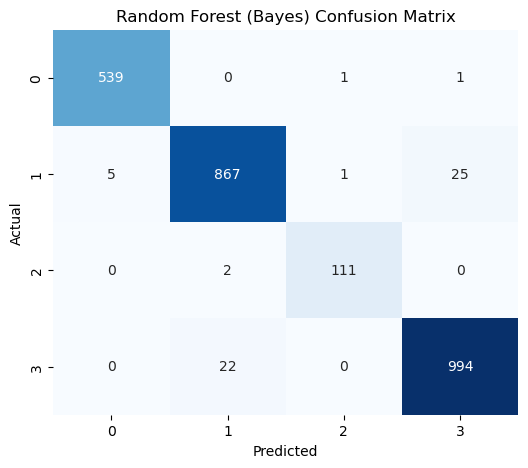

==== Random Forest (Bayes) ====
Accuracy: 0.9778
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       541
           1       0.97      0.97      0.97       898
           2       0.98      0.98      0.98       113
           3       0.97      0.98      0.98      1016

    accuracy                           0.98      2568
   macro avg       0.98      0.98      0.98      2568
weighted avg       0.98      0.98      0.98      2568



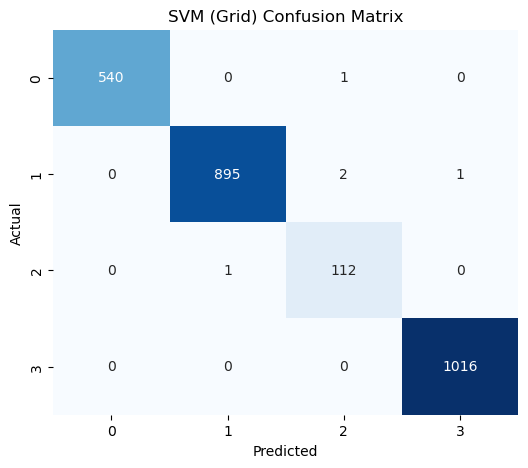

==== SVM (Grid) ====
Accuracy: 0.9981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       541
           1       1.00      1.00      1.00       898
           2       0.97      0.99      0.98       113
           3       1.00      1.00      1.00      1016

    accuracy                           1.00      2568
   macro avg       0.99      1.00      0.99      2568
weighted avg       1.00      1.00      1.00      2568



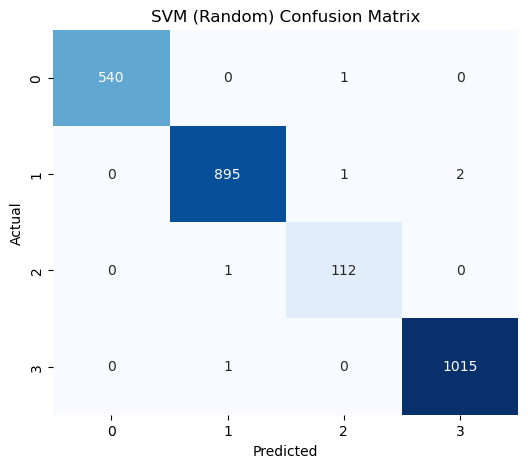

==== SVM (Random) ====
Accuracy: 0.9977
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       541
           1       1.00      1.00      1.00       898
           2       0.98      0.99      0.99       113
           3       1.00      1.00      1.00      1016

    accuracy                           1.00      2568
   macro avg       0.99      1.00      1.00      2568
weighted avg       1.00      1.00      1.00      2568



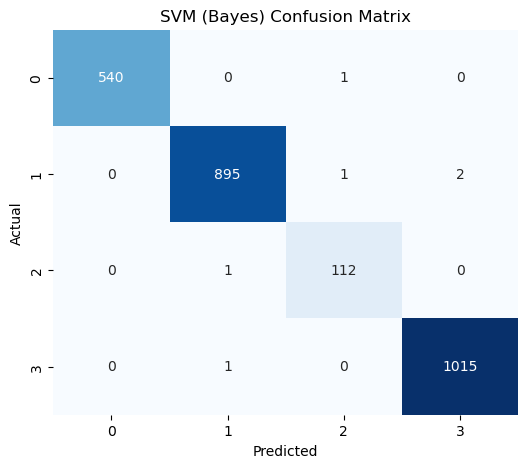

==== SVM (Bayes) ====
Accuracy: 0.9977
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       541
           1       1.00      1.00      1.00       898
           2       0.98      0.99      0.99       113
           3       1.00      1.00      1.00      1016

    accuracy                           1.00      2568
   macro avg       0.99      1.00      1.00      2568
weighted avg       1.00      1.00      1.00      2568



In [248]:
# Decision Tree
best_dt_grid = grid_dt.best_estimator_
best_dt_random = random_dt.best_estimator_
best_dt_bayes = bayes_dt.best_estimator_

# Random Forest
best_rf_grid = grid_rf.best_estimator_
best_rf_random = random_rf.best_estimator_
best_rf_bayes = bayes_rf.best_estimator_

# SVM
best_svm_grid = grid_svm.best_estimator_
best_svm_random = random_svm.best_estimator_
best_svm_bayes = bayes_svm.best_estimator_

results = {
    "Decision Tree (Grid)": evaluate_model_hypertuning(best_dt_grid, X_test_preprocessed, y_test, "Decision Tree (Grid)"),
    "Decision Tree (Random)": evaluate_model_hypertuning(best_dt_random, X_test_preprocessed, y_test, "Decision Tree (Random)"),
    "Decision Tree (Bayes)": evaluate_model_hypertuning(best_dt_bayes, X_test_preprocessed, y_test, "Decision Tree (Bayes)"),

    "Random Forest (Grid)": evaluate_model_hypertuning(best_rf_grid, X_test_preprocessed, y_test, "Random Forest (Grid)"),
    "Random Forest (Random)": evaluate_model_hypertuning(best_rf_random, X_test_preprocessed, y_test, "Random Forest (Random)"),
    "Random Forest (Bayes)": evaluate_model_hypertuning(best_rf_bayes, X_test_preprocessed, y_test, "Random Forest (Bayes)"),

    "SVM (Grid)": evaluate_model_hypertuning(best_svm_grid, X_test_preprocessed, y_test, "SVM (Grid)"),
    "SVM (Random)": evaluate_model_hypertuning(best_svm_random, X_test_preprocessed, y_test, "SVM (Random)"),
    "SVM (Bayes)": evaluate_model_hypertuning(best_svm_bayes, X_test_preprocessed, y_test, "SVM (Bayes)")
}



In [249]:
# Ringkasan ke dalam DataFrame
summary_rows = []
for name, metrics in results.items():
    summary_rows.append({
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision (macro avg)'],
        'Recall': metrics['Recall (macro avg)'],
        'F1-Score': metrics['F1-Score (macro avg)']
    })

summary_df = pd.DataFrame(summary_rows)
print("\n=== Summary Evaluation ===")
print(summary_df)


=== Summary Evaluation ===
                    Model  Accuracy  Precision    Recall  F1-Score
0    Decision Tree (Grid)  0.973131   0.977547  0.977190  0.977367
1  Decision Tree (Random)  0.973131   0.977547  0.977190  0.977367
2   Decision Tree (Bayes)  0.973131   0.977547  0.977190  0.977367
3    Random Forest (Grid)  0.977414   0.978227  0.980329  0.979266
4  Random Forest (Random)  0.977025   0.979645  0.980083  0.979857
5   Random Forest (Bayes)  0.977804   0.980171  0.980607  0.980383
6              SVM (Grid)  0.998053   0.992953  0.996490  0.994702
7            SVM (Random)  0.997664   0.994565  0.996244  0.995399
8             SVM (Bayes)  0.997664   0.994565  0.996244  0.995399



=== Decision Tree (Grid) ===
Confusion Matrix:
[[537   2   1   1]
 [  2 866   1  29]
 [  0   2 111   0]
 [  0  31   0 985]]


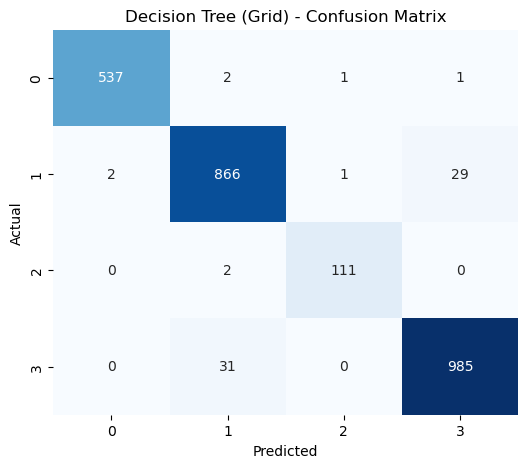


=== Decision Tree (Random) ===
Confusion Matrix:
[[537   2   1   1]
 [  2 866   1  29]
 [  0   2 111   0]
 [  0  31   0 985]]


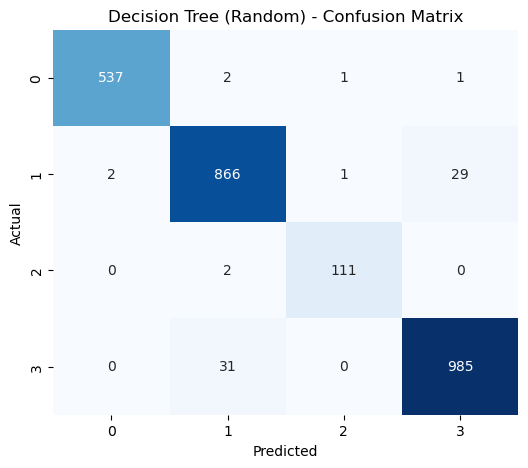


=== Decision Tree (Bayes) ===
Confusion Matrix:
[[537   2   1   1]
 [  2 866   1  29]
 [  0   2 111   0]
 [  0  31   0 985]]


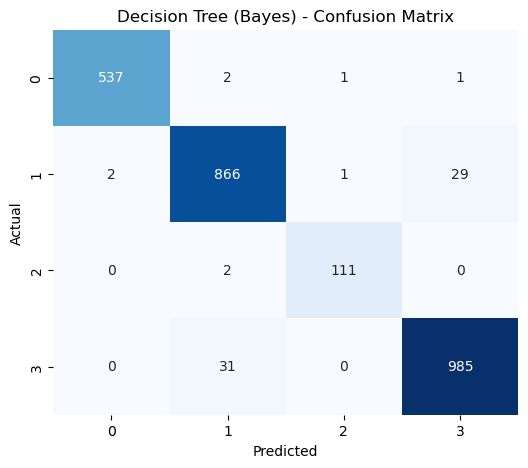


=== Random Forest (Grid) ===
Confusion Matrix:
[[539   0   1   1]
 [  4 866   2  26]
 [  0   2 111   0]
 [  0  22   0 994]]


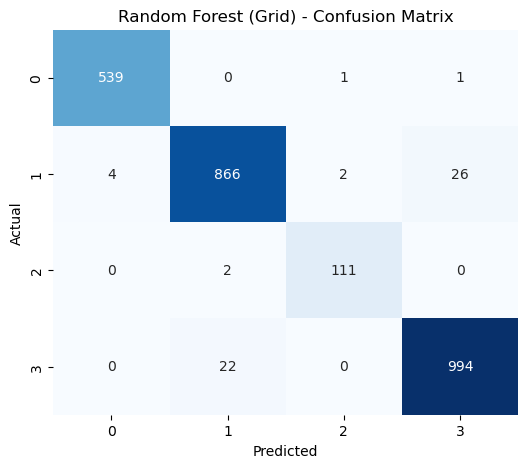


=== Random Forest (Random) ===
Confusion Matrix:
[[539   0   1   1]
 [  5 866   1  26]
 [  0   2 111   0]
 [  0  23   0 993]]


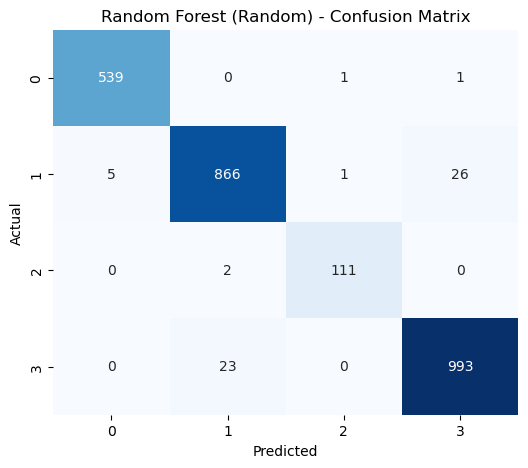


=== Random Forest (Bayes) ===
Confusion Matrix:
[[539   0   1   1]
 [  5 867   1  25]
 [  0   2 111   0]
 [  0  22   0 994]]


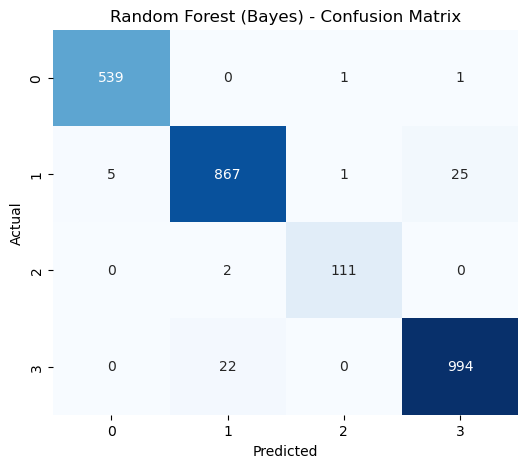


=== SVM (Grid) ===
Confusion Matrix:
[[ 540    0    1    0]
 [   0  895    2    1]
 [   0    1  112    0]
 [   0    0    0 1016]]


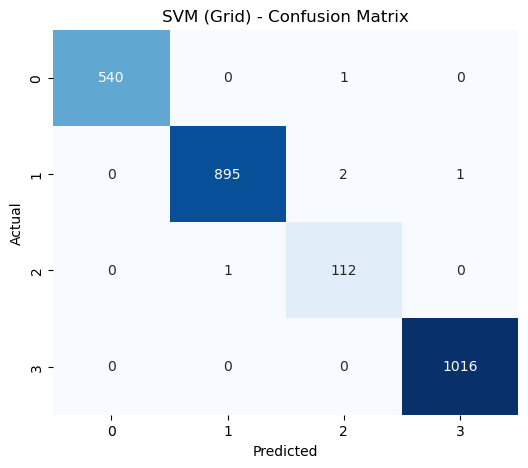


=== SVM (Random) ===
Confusion Matrix:
[[ 540    0    1    0]
 [   0  895    1    2]
 [   0    1  112    0]
 [   0    1    0 1015]]


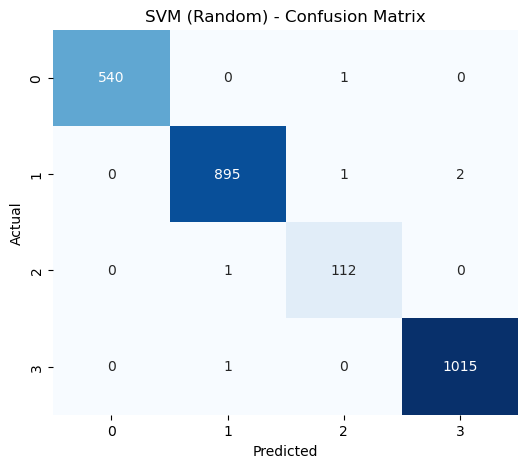


=== SVM (Bayes) ===
Confusion Matrix:
[[ 540    0    1    0]
 [   0  895    1    2]
 [   0    1  112    0]
 [   0    1    0 1015]]


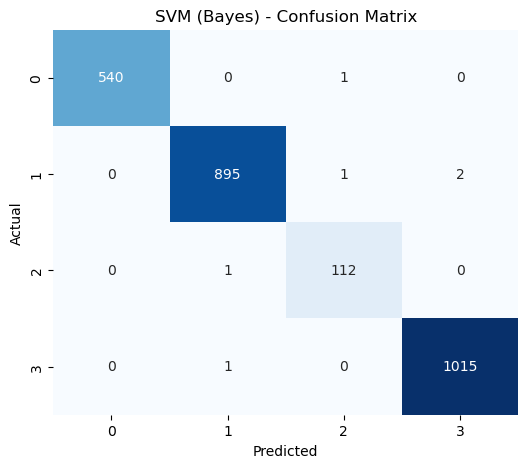

In [250]:
# Visualisasi ulang semua Confusion Matrix
for name, metrics in results.items():
    print(f"\n=== {name} ===")
    cm = metrics['Confusion Matrix']
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

1. Decision Tree
- Sebelum Tuning :
    - Akurasi: 0.9762
    - Precision (weighted avg): 0.9823
    - Recall (weighted avg): 0.9836
    - F1-Score (weighted avg): 0.9829
    - Confusion Matrix menunjukkan beberapa misclassification, terutama pada kelas 1 (35 salah prediksi ke kelas 3) dan kelas 3 (24 salah prediksi ke kelas 1).

- Setelah Tuning (Grid, Random, Bayes) :
    - Akurasi: 0.9731 (sedikit menurun untuk semua metode tuning).
    - Precision (weighted avg): 0.9775 (sedikit menurun).
    - Recall (weighted avg): 0.9772 (menurun).
    - F1-Score (weighted avg): 0.9774 (menurun).
    - Confusion Matrix menunjukkan peningkatan misclassification pada kelas 1 (29 salah prediksi ke kelas 3) dan kelas 3 (31 salah prediksi ke kelas 1) dibandingkan sebelum tuning.

- Analisa : Tuning tidak meningkatkan performa Decision Tree, malah sedikit menurunkan akurasi dan metrik lainnya. Ini menunjukkan bahwa parameter default mungkin sudah cukup optimal atau tuning yang dilakukan kurang sesuai.

1. Decision Tree
- Sebelum Tuning :
    - Akurasi: 0.9762
    - Precision (weighted avg): 0.9823
    - Recall (weighted avg): 0.9836
    - F1-Score (weighted avg): 0.9829
    - Confusion Matrix menunjukkan beberapa misclassification, terutama pada kelas 1 (35 salah prediksi ke kelas 3) dan kelas 3 (24 salah prediksi ke kelas 1).

- Setelah Tuning (Grid, Random, Bayes) :
    - Akurasi: 0.9731 (sedikit menurun untuk semua metode tuning).
    - Precision (weighted avg): 0.9775 (sedikit menurun).
    - Recall (weighted avg): 0.9772 (menurun).
    - F1-Score (weighted avg): 0.9774 (menurun).
    - Confusion Matrix menunjukkan peningkatan misclassification pada kelas 1 (29 salah prediksi ke kelas 3) dan kelas 3 (31 salah prediksi ke kelas 1) dibandingkan sebelum tuning.

- Analisa : Tuning tidak meningkatkan performa Decision Tree, malah sedikit menurunkan akurasi dan metrik lainnya. Ini menunjukkan bahwa parameter default mungkin sudah cukup optimal atau tuning yang dilakukan kurang sesuai.


2. Random Forest
- Sebelum Tuning :
    - Akurasi: 0.9790
    - Precision (weighted avg): 0.9829
    - Recall (weighted avg): 0.9814
    - F1-Score (weighted avg): 0.9821
    - Confusion Matrix menunjukkan misclassification pada kelas 1 (24 salah prediksi ke kelas 3) dan kelas 3 (21 salah prediksi ke kelas 1).

- Setelah Tuning (Grid, Random, Bayes) :
    - Grid: Akurasi 0.9774, Precision 0.9782, Recall 0.9803, F1-Score 0.9793.
    - Random: Akurasi 0.9770, Precision 0.9796, Recall 0.9801, F1-Score 0.9799.
    - Bayes: Akurasi 0.9778, Precision 0.9802, Recall 0.9806, F1-Score 0.9804.
    - Confusion Matrix (contoh Bayes) menunjukkan sedikit perbaikan, dengan kelas 1 (25 salah prediksi ke kelas 3) dan kelas 3 (22 salah prediksi ke kelas 1).

- Analisa : Performanya hampir stagnan, dengan sedikit penurunan akurasi pada Grid dan Random, tetapi Bayes memberikan sedikit peningkatan pada Recall dan F1-Score. Tuning tidak memberikan dampak signifikan.

3. SVM
- Sebelum Tuning :
    - Akurasi: 0.9883
    - Precision (weighted avg): 0.9869
    - Recall (weighted avg): 0.9916
    - F1-Score (weighted avg): 0.9892
    - Confusion Matrix menunjukkan sedikit misclassification, terutama pada kelas 1 (10 salah prediksi ke kelas 3) dan kelas 3 (10 salah prediksi ke kelas 1).

- Setelah Tuning (Grid, Random, Bayes) :
   - Grid: Akurasi 0.9981, Precision 0.9930, Recall 0.9965, F1-Score 0.9947.
    - Random: Akurasi 0.9977, Precision 0.9946, Recall 0.9962, F1-Score 0.9954.
    - Bayes: Akurasi 0.9977, Precision 0.9946, Recall 0.9962, F1-Score 0.9954.
    - Confusion Matrix (contoh Grid) menunjukkan hampir sempurna, dengan hanya 5 misclassification secara total.

- Analisa : SVM mengalami peningkatan signifikan setelah tuning, terutama pada metode Grid, dengan akurasi mendekati 1.0 dan metrik lainnya sangat tinggi. Tuning sangat efektif untuk SVM.



Identifikasi Kelemahan Model
Precision atau Recall Rendah untuk Kelas Tertentu

1. Decision Tree (Sebelum dan Sesudah Tuning):
    - Kelas 1 memiliki Precision dan Recall lebih rendah (0.96 setelah tuning) dibandingkan kelas lain (0.98–1.00). Ini terlihat dari Confusion Matrix, di mana kelas 1 sering salah diprediksi sebagai kelas 3 (29–35 kasus).
    - Kelas 3 juga memiliki Precision dan Recall sedikit lebih rendah (0.97) karena salah prediksi ke kelas 1 (24–31 kasus).

2. Random Forest (Sebelum dan Sesudah Tuning):
    - Kelemahan serupa pada kelas 1, dengan Precision dan Recall sekitar 0.96–0.97. Confusion Matrix menunjukkan kelas 1 sering salah diprediksi sebagai kelas 3 (24–26 kasus).
    - Kelas 3 memiliki sedikit misclassification ke kelas 1 (21–23 kasus).

3. SVM (Sebelum Tuning):
    - Kelas 1 memiliki Precision dan - Recall sedikit lebih rendah (meski masih tinggi, ~0.99), dengan 10 kasus salah prediksi ke kelas 3.
    - Kelas 2 memiliki Recall sempurna, tetapi Precision sedikit lebih rendah karena satu kasus salah prediksi.

    SVM (Setelah Tuning):
    - Kelemahan minimal, tetapi kelas 2 memiliki Precision dan Recall sedikit lebih rendah (0.97–0.99) dibandingkan kelas lain (1.00). Confusion Matrix menunjukkan hanya 1–2 misclassification pada kelas 2.



Overfitting atau Underfitting

1.  Decision Tree:
    - Sebelum Tuning: Akurasi tinggi (0.9762), tetapi Confusion Matrix menunjukkan misclassification pada kelas 1 dan 3, mengindikasikan sedikit underfitting untuk kelas-kelas ini.
    - Setelah Tuning: Akurasi menurun (0.9731), dan misclassification meningkat. Ini menunjukkan kemungkinan overfitting karena tuning mungkin menghasilkan model yang terlalu kompleks untuk data tertentu, atau parameter yang dipilih tidak generalisasi dengan baik.

2. Random Forest:
    - Sebelum Tuning: Akurasi tinggi (0.9790) dengan sedikit misclassification, menunjukkan model cukup seimbang, tetapi masih ada ruang untuk perbaikan pada kelas 1 dan 3 (underfitting ringan).
    - Setelah Tuning: Akurasi hampir sama (0.9770–0.9778), menunjukkan tidak ada overfitting signifikan. Namun, minimnya peningkatan performa menunjukkan model mungkin sudah mendekati batas kemampuannya dengan data ini.

3. SVM
    - Sebelum Tuning: Akurasi sangat tinggi (0.9883) dengan sedikit misclassification, menunjukkan model sudah sangat baik dan tidak ada tanda overfitting atau underfitting signifikan.
    - Setelah Tuning: Akurasi mendekati sempurna (0.9981 pada Grid), tetapi Precision dan Recall kelas 2 sedikit lebih rendah. Tidak ada indikasi overfitting karena performa sangat konsisten, tetapi perlu diperhatikan jika model terlalu "sempurna" pada data uji ini (potensi overfitting jika data baru berbeda).

Rekomendasi Tindakan Lanjutan

1. Pertahankan SVM sebagai Model Utama:
    - SVM setelah tuning (khususnya Grid) memberikan performa terbaik (akurasi 0.9981). Rekomendasi:
    - Gunakan SVM (Grid) sebagai model utama untuk deployment, tetapi lakukan validasi silang (cross-validation) lebih lanjut untuk memastikan tidak ada overfitting pada data baru.
    - Perhatikan kelas 2, yang memiliki Precision dan Recall sedikit lebih rendah. Tambahkan lebih banyak data untuk kelas 2 jika memungkinkan.

2. Pemeriksaan Overfitting:
    - Khususnya untuk SVM, akurasi mendekati 1.0 dapat mengindikasikan potensi overfitting jika data uji tidak representatif. Rekomendasi:
    - Lakukan cross-validation dengan lebih banyak fold (misalnya, 10-fold) untuk memastikan konsistensi performa.
    - Periksa distribusi data pelatihan dan uji untuk memastikan tidak ada bias atau kebocoran data (data leakage).